## Read txt file with isotopes information and create colourmap of A Z

In [1]:
import ast
import matplotlib.pyplot as plt
import matplotlib as mpl
from operator import itemgetter

First we read the txt file where the first line contains the lists of isotopes and counts that were returned with ussrnc.f and looped through with ussrnc_plot.py -> it is the list where all runs have been added (which will be an indication of the number of muons simulated).

In [7]:
def read_file(residnuc_file):
    # read the txt file where the first line contains lists in
    # the form of [[Z1,A1,count1],[Z2,A2,count2],[...]]

    file = open(residnuc_file, 'r')
    line1 = file.readline()

    # convert the string to a list
    isotope_list = ast.literal_eval(line1)

    return isotope_list

def extract_list(isotope_list):
    # input a list of the form [[Z1,A1,count1],[Z2,A2,count2],[...]]
    # returns the 1st, 2nd and 3rd value of each sublist in seperate lists

    Z_list, A_list, count_list = zip(*isotope_list)
    Z_list, A_list, count_list = list(Z_list), list(A_list), list(count_list)

    return Z_list, A_list, count_list

isotope_list = read_file("/project/xenon/kweerman/exercises/ZResults/Ieki/AZisotopesIeki.txt")
Z_list, A_list, count_list = extract_list(isotope_list)

Finally the colour map (histogram) is created

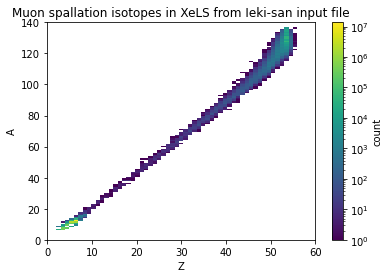

In [8]:
def histogram(Z_list, A_list, count_list, plot=True):
    # creates a histogram of all isotopes

    x_bins = (max(Z_list) - min(Z_list)) + 1
    y_bins = (max(A_list) - min(A_list)) + 1
    plt.hist2d(Z_list, A_list, weights=count_list, bins=[x_bins, y_bins], norm=mpl.colors.LogNorm(), cmin=1)
    plt.xlim([0,60])
    plt.ylim([0,140])
    plt.xlabel("Z")
    plt.ylabel("A")
    plt.title("Muon spallation isotopes in XeLS from Ieki-san input file")
    plt.colorbar(label="count")
    #plt.savefig("AZisotopesIeki.png")
    return 

histogram(Z_list, A_list, count_list)